In [1]:
import numpy as np
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

In [2]:
planet = Planet('URANUS')
planet.loadAtmosphereModel('../atmdata/uranus-gram-avg.dat', 0 , 1 ,2, 3, heightInKmFlag=True)
planet.h_skip = 1000.0E3

# Set up a vehicle object
vehicle1=Vehicle('UranusOrbiter', 5700, 30, 0.0, 113.0, 0.0, 1.00, planet)
vehicle1.setInitialState(1000.0,-15.22,75.55,26.2877,88.687,-11.0 ,0.0,0.0)
vehicle1.setSolverParams(1E-5)
vehicle1.setDragModulationVehicleParams(30, 4.14)

In [3]:
underShootLimit, exitflag_us = vehicle1.findUnderShootLimitD2(2400.0, 1.0, -20.0,-5.0, 1E-8, 500e3)
overShootLimit , exitflag_os = vehicle1.findOverShootLimitD2(2400.0, 1.0, -20.0,-5.0, 1E-8,  500e3)

# print the overshoot and undershoot limits we just computed.
print("Overshoot  limit : "+str('{:.4f}'.format(overShootLimit))+ " deg")
print("Undershoot limit : "+str('{:.4f}'.format(underShootLimit))+ " deg")
print("TCW: "+ str('{:.4f}'.format(overShootLimit-underShootLimit))+ " deg")

Overshoot  limit : -10.2492 deg
Undershoot limit : -10.7103 deg
TCW: 0.4612 deg


In [4]:
# Set planet.h_low to 10 km, if vehicle dips below this level
# trajctory is terminated.
planet.h_low=50.0E3

# Set target orbit = 2000 km x 2000 km, tolerance = 20 km
# target apo intentionally set to slightly higher value to account for bias in guidance
vehicle1.setTargetOrbitParams(4000, 500e3, 10.0e3)

# Set entry phase parameters
# v_switch_kms = 2.0, lowAlt_km = 20.0,
# numPoints_lowAlt = 101, hdot_threshold = -200.0 m/s.
# These are somewhat arbitary based on experience.
vehicle1.setDragEntryPhaseParams(2.0, 50.0, 101, -200.0)

# Set beta_1 and beta_ratio
vehicle1.setDragModulationVehicleParams(30, 4.14)

# Set vehicle initial state
vehicle1.setInitialState(1000.0,-15.22,75.55,26.2877,88.687,-10.3 ,0.0,0.0)
# Propogate a single vehicle trajectory
vehicle1.propogateGuidedEntryD2(0.5,1.0,1.0,6000.0)

In [5]:
vehicle1.periapsis_raise_DV

64.16256893229331

In [6]:
import matplotlib.pyplot as plt

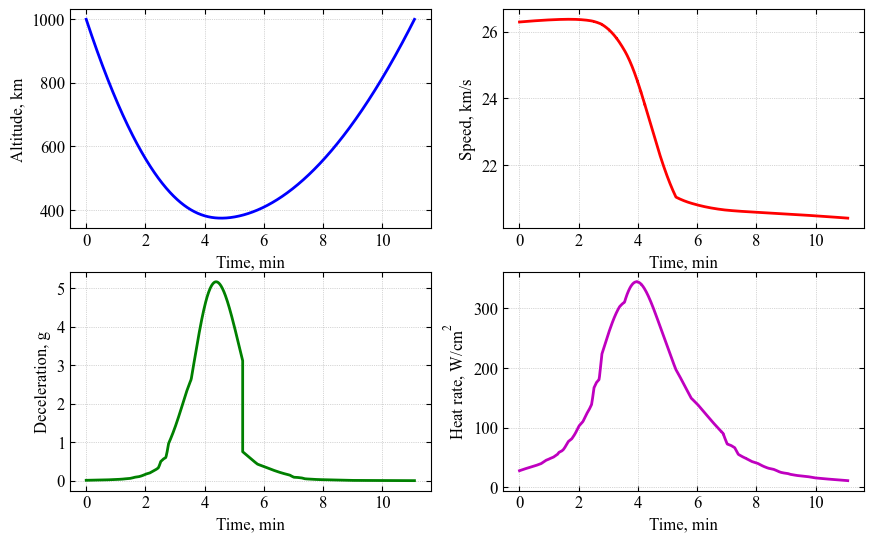

In [7]:
plt.figure(figsize=(10.25, 6.25))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.subplot(2, 2, 1)
plt.plot(vehicle1.t_min_full, vehicle1.h_km_full, 'b-', linewidth=2.0)
plt.xlabel('Time, min',fontsize=12)
plt.ylabel('Altitude, km',fontsize=12)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=12)
ax.tick_params(axis='y',labelsize=12)
plt.grid(linestyle='dotted', linewidth=0.5)

plt.subplot(2, 2, 2)
plt.plot(vehicle1.t_min_full, vehicle1.v_kms_full, 'r-', linewidth=2.0)
plt.ylabel('Speed, km/s',fontsize=12)
plt.xlabel('Time, min',fontsize=12)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=12)
ax.tick_params(axis='y',labelsize=12)
plt.grid(linestyle='dotted', linewidth=0.5)


plt.subplot(2, 2, 3)
plt.plot(vehicle1.t_min_full, vehicle1.acc_net_g_full, 'g-', linewidth=2.0)
plt.xlabel('Time, min',fontsize=12)
plt.ylabel('Deceleration, g',fontsize=12)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=12)
ax.tick_params(axis='y',labelsize=12)
plt.grid(linestyle='dotted', linewidth=0.5)

plt.subplot(2, 2, 4)
plt.plot(vehicle1.t_min_full, vehicle1.q_stag_total_full, 'm-', linewidth=2.0)
plt.xlabel('Time, min',fontsize=12)
plt.ylabel('Heat rate, '+r'$W/cm^2$',fontsize=12)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=12)
ax.tick_params(axis='y',labelsize=12)
plt.grid(linestyle='dotted', linewidth=0.5)

plt.savefig('../ice-giant-lift-drag-comparison-plots/uranus-drag-modulation.png', dpi= 300,bbox_inches='tight')
plt.show()

In [9]:
from scipy import integrate

In [16]:
integrate.cumtrapz(vehicle1.q_stag_total_full, vehicle1.t_min_full*60, initial=0)[-1]/1e3

77.3189677532342